Выполните задание:
1. Загрузите файл HR.csv в pandas dataframe.
2. Рассчитайте основные статистики для переменных: среднее, медиана, мода, мин/макс, среднее отклонение.
3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.
4. Рассчитайте, сколько сотрудников работает в каждом департаменте.
5. Покажите распределение сотрудников по зарплатам.
6. Покажите распределение сотрудников по зарплатам в каждом департаменте по отдельности.
7. Проверьте гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.
8. Рассчитайте следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
 - доля сотрудников с повышением за последние 5 лет;
 - средняя степень удовлетворённости;
 - среднее количество проектов.
9. Разделите данные на тестовую и обучающую выборки.
10. Постройте модель LDA, которая показывает, уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).
11. Оцените качество модели на тестовой выборке. Используйте метод accuracy.
12. Загрузите Jupyter Notebook с решением на GitHub и разместите ссылку на ваше решение в личном кабинете в «Итоговом задании. Часть 2».

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [21]:
#1
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
#2
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [23]:
modes = df.mode().iloc[0]
modes

satisfaction_level         0.1
last_evaluation           0.55
number_project             4.0
average_montly_hours       135
time_spend_company         3.0
Work_accident              0.0
left                       0.0
promotion_last_5years      0.0
department               sales
salary                     low
Name: 0, dtype: object

<AxesSubplot:>

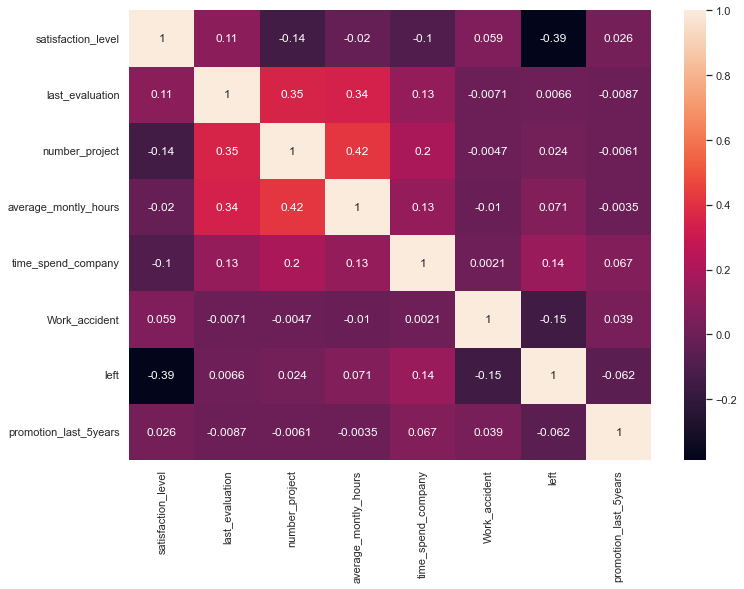

In [24]:
#3
correlation_matrix = df.drop(['department', 'salary'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True)

In [25]:
highest_corr = abs(correlation_matrix.unstack()).sort_values(ascending=False).drop_duplicates()
lowest_corr = abs(correlation_matrix.unstack()).sort_values().drop_duplicates()

In [26]:
highest_corr.head(2)

satisfaction_level  satisfaction_level      1.000000
number_project      average_montly_hours    0.417211
dtype: float64

In [27]:
lowest_corr.head(2)

Work_accident         time_spend_company       0.002120
average_montly_hours  promotion_last_5years    0.003544
dtype: float64

In [28]:
#4
df['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

<AxesSubplot:xlabel='salary', ylabel='count'>

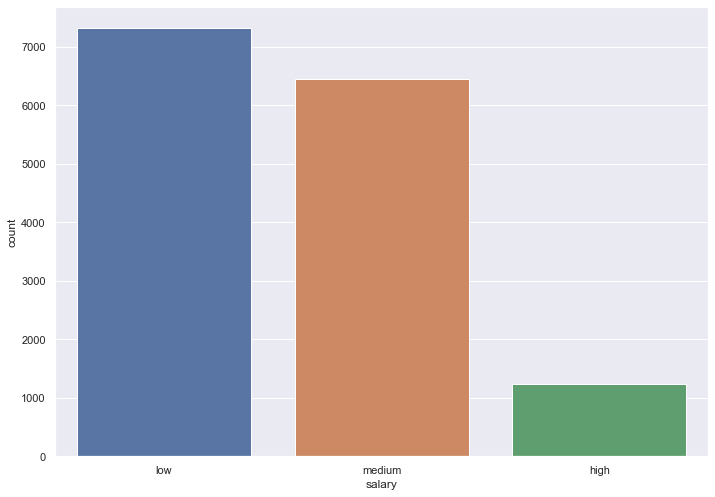

In [29]:
#5
sns.countplot(x='salary', data=df)

<AxesSubplot:xlabel='department', ylabel='count'>

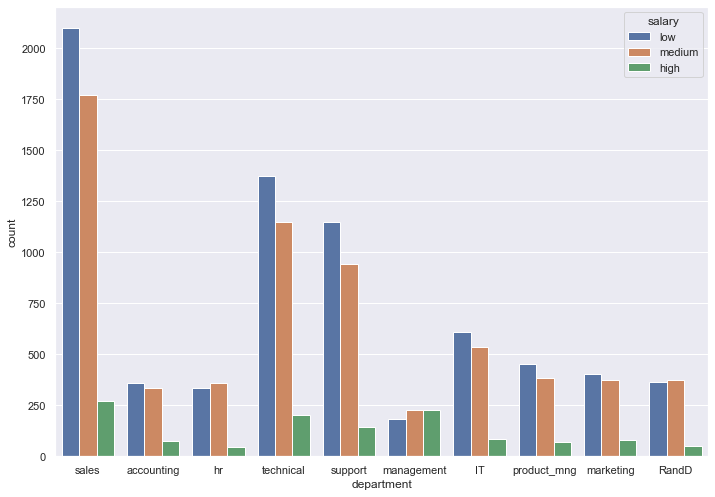

In [30]:
#6
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='department', hue='salary', data=df)

In [31]:
#7
high_salary_hours = df[df['salary'] == 'high']['average_montly_hours']
low_salary_hours = df[df['salary'] == 'low']['average_montly_hours']

In [32]:
# Проверка гипотезы
t_stat, p_value = stats.ttest_ind(high_salary_hours, low_salary_hours, equal_var=False)

if p_value < 0.05:
    print("Разница в среднем времени на работе для сотрудников с разным уровнем зарплаты статистически значима.")
else:
    print("Разница в среднем времени на работе для сотрудников с разным уровнем зарплаты не является статистически значимой.")

Разница в среднем времени на работе для сотрудников с разным уровнем зарплаты не является статистически значимой.


In [33]:
#8
df.groupby('left')['promotion_last_5years'].mean()

left
0    0.026251
1    0.005321
Name: promotion_last_5years, dtype: float64

In [34]:
df.groupby('left')['satisfaction_level'].mean()

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [35]:
df.groupby('left')['number_project'].mean()

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

In [36]:
#9
X = df.drop(['left', 'department', 'salary'], axis=1)
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
#10
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [38]:
#11
print(f'Accuracy = {round(lda.score(X_test, y_test), 2)}')

Accuracy = 0.75


Уровень точности приемлемый